In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time
%matplotlib inline

# Clean the data

In [2]:
#Load the data
df = pd.read_csv('divorce.csv',sep = ';')
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


# Make the categories instead of regression

# Prepare data to split into train/test

In [3]:
train, test = train_test_split(df,test_size = .3, random_state=42)

xtrain = train.drop(['Class'], axis=1)
ytrain = train["Class"]

xtest = test.drop(['Class'], axis=1)
ytest = test["Class"]

# Initialize Comparison

In [4]:
algoTimes = []
algoAccuracies = []

algoXLabels = ['DTree Pruning', 'NN', 'DTree Boosting', 'SVM', 'KNN']

# Decision Tree with Pruning

In [5]:
depth_range = range(1, 20)
entropyTrain = []
entropyTest = []
giniTrain = []
giniTest = []
start_time = time.time()
for depth in depth_range:
    #Gini training
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    dtree.fit(xtrain, ytrain)
    ypredTrain = dtree.predict(xtrain)
    ypredTest = dtree.predict(xtest)
    
    giniTrain.append(accuracy_score(ytrain,ypredTrain))
    giniTest.append(accuracy_score(ytest,ypredTest))


    #Entropy Training
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    dtree.fit(xtrain, ytrain)
    ypredTrain = dtree.predict(xtrain)
    ypredTest = dtree.predict(xtest)
    
    entropyTrain.append(accuracy_score(ytrain,ypredTrain))
    entropyTest.append(accuracy_score(ytest,ypredTest))
algoTimes.append(time.time() - start_time)

96.07843137254902
96.07843137254902


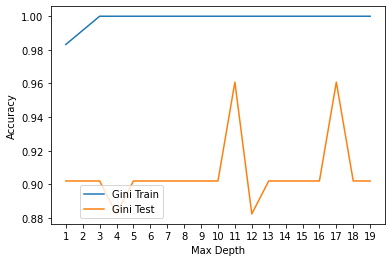

In [6]:
# Gini vs Entropy
plt.plot(depth_range,giniTrain,label='Gini Train')
plt.plot(depth_range,giniTest, label='Gini Test')
plt.xticks(depth_range)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(.35, 0.2))
print(max(entropyTest) * 100)
print(max(giniTest) * 100)
algoAccuracies.append(max(giniTest))

100.0
100.0


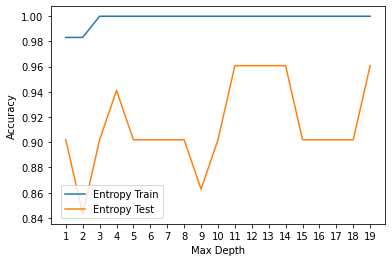

In [7]:
# Gini vs Entropy
plt.plot(depth_range,entropyTrain,label='Entropy Train')
plt.plot(depth_range,entropyTest, label='Entropy Test')
plt.xticks(depth_range)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(.35, 0.2))
print(max(entropyTrain) * 100)
print(max(giniTrain) * 100)

# Neural Networks

In [8]:
hiddenlayer = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
nnTrain = []
nnTest = []
for i in hiddenlayer:
    nn = MLPClassifier(hidden_layer_sizes = (i,), learning_rate_init=0.05, random_state=42)
    nn.fit(xtrain, ytrain)
    ypredTrain = nn.predict(xtrain)
    ypredTest = nn.predict(xtest)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))

100.0
100.0


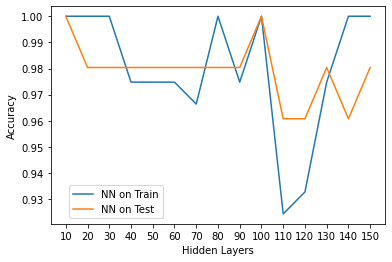

In [9]:
plt.plot(hiddenlayer,nnTrain,label='NN on Train')
plt.plot(hiddenlayer,nnTest,label='NN on Test')
plt.xticks(hiddenlayer)
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

In [10]:
nnParams = {
    'hidden_layer_sizes':[(10,),(30,),(50,),(70,),(90,),(110,),(130,),(150,)],
    'activation':['tanh', 'relu', 'logistic'],
    'solver':['sgd','adam'],
    'alpha':[0.0001,.005,.01,.05],
    'learning_rate':['constant', 'adaptive'],
}
nn = MLPClassifier()
start_time = time.time()
clf = GridSearchCV(nn,nnParams,n_jobs=-1,cv=2)
clf.fit(xtrain,ytrain)
print('Best parameters found:\n', clf.best_params_)

algoTimes.append(time.time() - start_time)

ypredTest = clf.predict(xtest)
accuracy_score(ytest,ypredTest)

algoAccuracies.append(accuracy_score(ytest,ypredTest))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}


C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Boosted Decision Tree

In [11]:
estimators = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bTreeTrain = []
bTreeTest = []
for i in estimators:
    bDtree = GradientBoostingClassifier(n_estimators=i, random_state=42)
    bDtree.fit(xtrain, ytrain)
    ypredTrain = bDtree.predict(xtrain)
    ypredTest = bDtree.predict(xtest)
    bTreeTrain.append(accuracy_score(ytrain,ypredTrain))
    bTreeTest.append(accuracy_score(ytest,ypredTest))

100.0
96.07843137254902


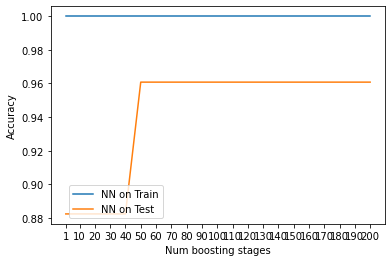

In [12]:
plt.plot(estimators,bTreeTrain,label='NN on Train')
plt.plot(estimators,bTreeTest,label='NN on Test')
plt.xticks(estimators)
plt.xlabel('Num boosting stages')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(bTreeTrain) * 100)
print(max(bTreeTest) * 100)

In [13]:
bdTreeParams = {
    'n_estimators': estimators,
    'max_depth':[3,4,5],
}
bDtree = GradientBoostingClassifier()
start_time = time.time()
clf = GridSearchCV(bDtree,bdTreeParams,n_jobs=-1,cv=2)
clf.fit(xtrain,ytrain)
algoTimes.append(time.time() - start_time)
print('Best parameters found:\n', clf.best_params_)

ypredTest = clf.predict(xtest)
print(accuracy_score(ytest,ypredTest))
algoAccuracies.append(accuracy_score(ytest,ypredTest))

Best parameters found:
 {'max_depth': 3, 'n_estimators': 60}
0.9607843137254902


# Support Vector Machines

In [14]:
#omitted precomputer kernel because it's not a square matrix
kernels = ['poly','rbf','sigmoid', 'linear']
poly = [2,3,4,5,6,7,8]

testAcc = []
trainAcc = []
start_time = time.time()
for kernel in kernels:
    if kernel == 'poly':
        for i in poly:
            svm = SVC(kernel = kernel, degree = i,random_state=42)
            svm.fit(xtrain,ytrain)
            ypredTrain = svm.predict(xtrain)
            ypredTest = svm.predict(xtest)
            trainAcc.append(accuracy_score(ytrain,ypredTrain))
            testAcc.append(accuracy_score(ytest,ypredTest))
    elif kernel == 'sigmoid':
        svm = SVC(kernel = kernel,random_state=42,gamma='auto')
        svm.fit(xtrain,ytrain)
        ypredTrain = svm.predict(xtrain)
        ypredTest = svm.predict(xtest)
        trainAcc.append(accuracy_score(ytrain,ypredTrain))
        testAcc.append(accuracy_score(ytest,ypredTest))
    else:
        svm = SVC(kernel = kernel,random_state=42)
        svm.fit(xtrain,ytrain)
        ypredTrain = svm.predict(xtrain)
        ypredTest = svm.predict(xtest)
        trainAcc.append(accuracy_score(ytrain,ypredTrain))
        testAcc.append(accuracy_score(ytest,ypredTest))
algoTimes.append(time.time()-start_time)

100.0
100.0


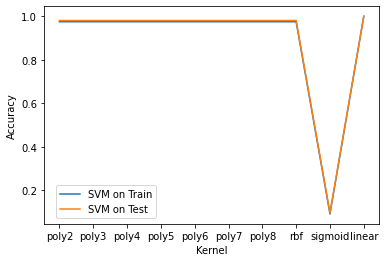

In [15]:
xlabels = ['poly2', 'poly3', 'poly4', 'poly5','poly6','poly7','poly8','rbf','sigmoid','linear']
plt.plot(xlabels, trainAcc,label='SVM on Train')
plt.plot(xlabels, testAcc,label='SVM on Test')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(testAcc) * 100)
print(max(trainAcc) * 100)
algoAccuracies.append(max(testAcc))

# k-nearest neighbors

In [16]:
neighbors = range(1, 20)
knnTrain = []
knnTest = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    ypredTrain = knn.predict(xtrain)
    ypredTest = knn.predict(xtest)
    knnTrain.append(accuracy_score(ytrain,ypredTrain))
    knnTest.append(accuracy_score(ytest,ypredTest))

100.0
98.0392156862745


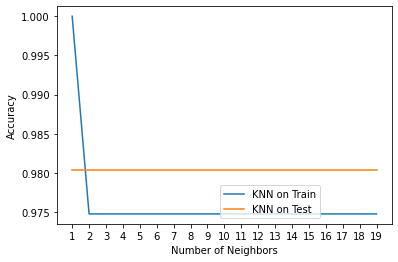

In [17]:
plt.plot(neighbors, knnTrain,label='KNN on Train')
plt.plot(neighbors, knnTest,label='KNN on Test')
plt.xticks(neighbors)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.2))
print(max(knnTrain) * 100)
print(max(knnTest) * 100)

In [18]:
knnParams = {
    'n_neighbors':[1,2,4,5,6,7,8,9,10],
    'weights': ['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
}
knn = KNeighborsClassifier()
start_time = time.time()
clf = GridSearchCV(knn,knnParams,n_jobs=-1,cv=2)
clf.fit(xtrain,ytrain)
algoTimes.append(time.time() - start_time)
print('Best parameters found:\n', clf.best_params_)

ypredTest = clf.predict(xtest)
print(accuracy_score(ytest,ypredTest))
algoAccuracies.append(accuracy_score(ytest,ypredTest))

Best parameters found:
 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
0.9803921568627451


# Comparison of Algorithms

In [19]:
algoAccuracies

[0.9607843137254902, 1.0, 0.9607843137254902, 1.0, 0.9803921568627451]

In [20]:
algoTimes

[0.19289755821228027,
 18.311766862869263,
 1.255711555480957,
 0.06399655342102051,
 0.2669997215270996]

Text(0.5, 0, 'Algorithms')

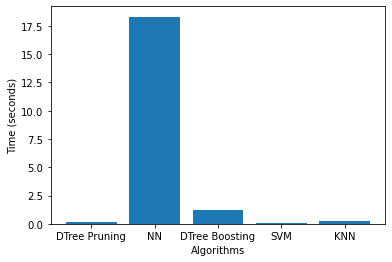

In [21]:
plt.bar(algoXLabels, algoTimes)
plt.ylabel('Time (seconds)')
plt.xlabel('Algorithms')

Text(0.5, 0, 'Algorithms')

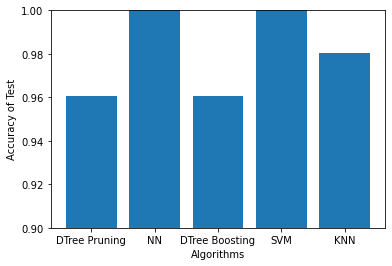

In [30]:
plt.bar(algoXLabels, algoAccuracies)
plt.ylabel('Accuracy of Test')
plt.ylim(.9, 1)
plt.xlabel('Algorithms')